In [1]:
import pandas
import numpy
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-white')

## Counting skills

In [3]:
n = 100
C = []
mydata = ['DSentry.txt','DSmid.txt','DSsenior.txt','HRSentry.txt','HRSmid.txt','HRSsenior.txt']
mylabel = [('Entry-Level','Data Scientist'),('Mid-Level','Data Scientist'),('Senior-Level','Data Scientist'),('Entry-Level','Human Resource Specialist'),('Mid-Level','Human Resource Specialist'),('Senior-Level','Human Resource Specialist')]
for file,label in zip(mydata,mylabel):
  c = 0
  m = 0
  for i in range(n):
    mydata = pandas.read_csv(file,sep='\t')
    mydata = mydata.sample(50,replace=False)
    mydata.description = mydata.description.str.lower() 
    mydata.description = mydata.description.str.replace(r'\b[a-z]\b|\b[0-9]+\b','',regex=True)
    mydata.description = mydata.description.str.replace(r'/',' ',regex=True)
    mydata.description = mydata.description.str.replace(r'.','',regex=True)
    mydata.description = mydata.description.str.replace(r'http\S+','',regex=True)
    description = mydata.description.to_list()
    description = ','.join(description)
    description = word_tokenize(description)
    description = [word for word in description if not word in stop_words]
    description = [word for word in description if not word in [',','@','!','?','.','–',':','#','’','(',')','%','--','-', "'",'&','$','\n']]
    description = [nltk.stem.LancasterStemmer().stem(word) for word in description]
    m = m + len(description)
    for word in description:
      c = c + word.count('analy')
  C.append([label,(c/m)/n])
mydf = pandas.DataFrame(C,columns=['index','count'])
mydf = mydf.set_index('index')
mydf.index = pandas.MultiIndex.from_tuples(mydf.index)
mydf = mydf.unstack(level=1)
mydf = mydf.droplevel(0,axis=1)
mydf['Fraction'] = mydf['Human Resource Specialist']/mydf['Data Scientist']
mydf

,Data Scientist,Human Resource Specialist,Fraction
Entry-Level,0.000107,0.000019,0.175124
Mid-Level,0.000133,0.000036,0.269594
Senior-Level,0.000135,0.000029,0.214309


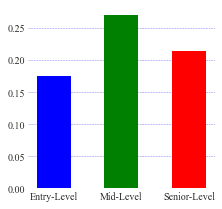

In [4]:
plt.rc("font",family="Times New Roman",size=10) 
barwidth = 1
fig = plt.figure(figsize=(3.34,3.34))
plt.bar(1,mydf.loc['Entry-Level','Fraction'],barwidth,align='center',color='blue')
plt.bar(3,mydf.loc['Mid-Level','Fraction'],barwidth,align='center',color='green')
plt.bar(5,mydf.loc['Senior-Level','Fraction'],barwidth,align='center',color='red')
plt.grid(axis='y',color='b',linestyle='--',linewidth=0.5,alpha=0.5)
plt.xticks([1,3,5],mydf.index)
plt.box(False)
plt.show()
fig.savefig('Bars.png',dpi=300)